# Project  - Vehicle Performance Prediction

## Problem Statement
Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators 
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment 
to developing ML capability that is not just useful but also used. Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled 
per litre)

## Dataset Information:

The data is about the technical specifications of cars. 
- Kilometer_per_liter: distance in kilometre travelled per litre
- cylinders: No of cylinders
- displacement: displacement
- horsepower: A horsepower is a unit of measurement of power, or the rate at 
which work is done, usually in reference to the output of 
engines or motors
- weight: Weight of car
- acceleration: Acceleration of Car
- model year: Model Year of the car
- origin: Country origin
- car name: Car brand and model name (unique for each instance)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings

# Loading the dataset

In [2]:
df = pd.read_csv("data-Copy1.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


# Preparing and understanding the dataset

In [3]:
df.shape

(398, 9)

In [4]:
df.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [5]:
df.tail()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [8]:
df.describe(include="all")

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,305,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,ford pinto,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,6,NaN
mean,1.572864,5.454774,193.425879,NaN,2970.424623,15.568090,1976.010050,NaN,9.997073
std,0.802055,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,NaN,3.322917
min,1.000000,3.000000,68.000000,NaN,1613.000000,8.000000,1970.000000,NaN,3.826293
25%,1.000000,4.000000,104.250000,NaN,2223.750000,13.825000,1973.000000,NaN,7.440015
50%,1.000000,4.000000,148.500000,NaN,2803.500000,15.500000,1976.000000,NaN,9.778305
75%,2.000000,8.000000,262.000000,NaN,3608.000000,17.175000,1979.000000,NaN,12.329168


<AxesSubplot:>

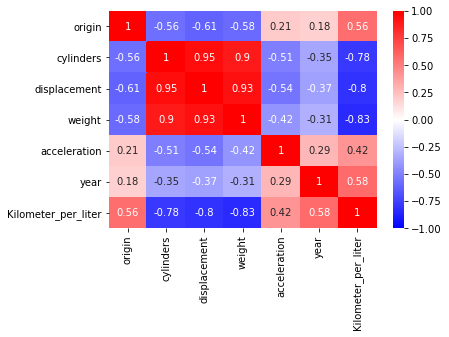

In [9]:
sns.heatmap(data = df.corr(), cmap = "bwr", vmin = -1, vmax = 1, annot = True)

In [10]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(include = "object")

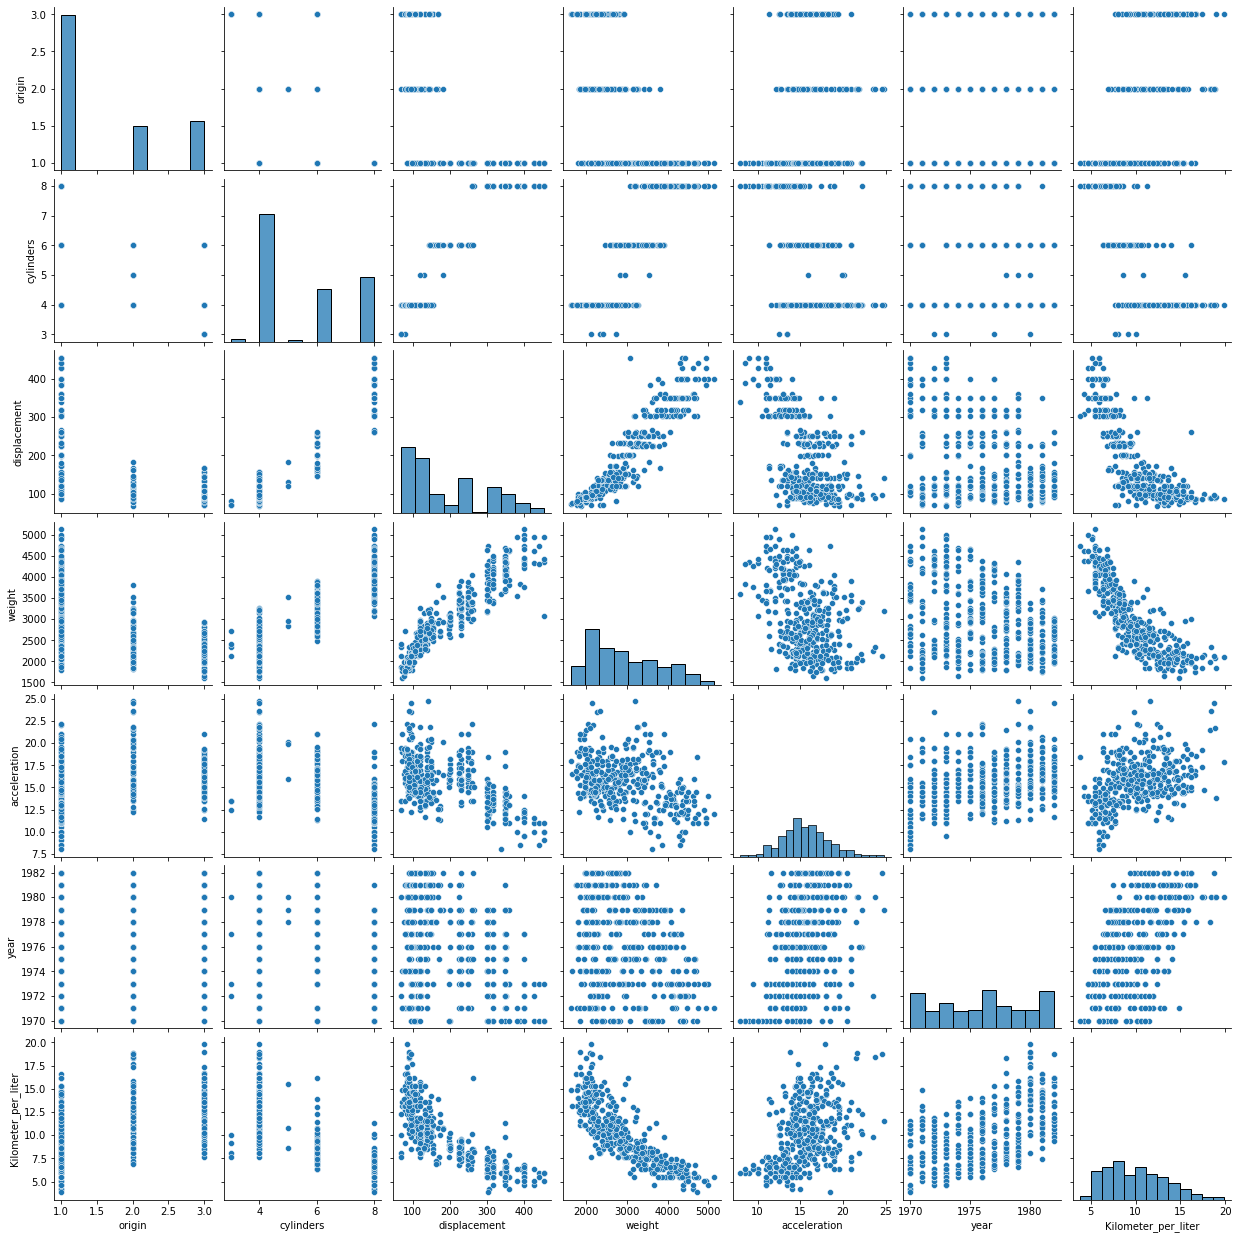

In [11]:
sns.pairplot(data = df_num)

### Checking for missing values 

In [12]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

#### There are no missing values

In [13]:
df1=pd.concat([df])

### Converting the datatype of orgin from int to object

In [14]:
df1.origin = df1.origin.astype("object")

In [15]:
df1.shape

(398, 9)

### Dropping the horsepower where values are '?'

In [16]:
df1.drop(df1[df1.horsepower=="?"].index, axis = 0, inplace = True)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


### Converting the datatype of horsepower from object to int

In [17]:
df1.horsepower = df1.horsepower.astype(int)

### Splitting the name into two columns as manufacturer and model

In [18]:
df1[["manufacturer","model"]] = df1.name.str.split(" ", n=1,expand = True)
df1.drop("name",axis = 1,inplace= True)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140,3449,10.5,1970,7.227443,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880,ford,mustang gl
394,2,4,97.0,52,2130,24.6,1982,18.706323,vw,pickup
395,1,4,135.0,84,2295,11.6,1982,13.604599,dodge,rampage
396,1,4,120.0,79,2625,18.6,1982,11.904024,ford,ranger


In [19]:
correction = {"chevy":"chevrolet",
             "toyouta":"toyota",
             "maxda":"mazda",
             "chevroelt":"chevrolet",
             "vw":"volkswagen",
             "mercedes-benz":"mercedes",
             "vokswagen":"volkswagen"}
df1.manufacturer = df1.manufacturer.map(correction).fillna(df1.manufacturer)

### We are dropping the model column because majority of the values are unique and it is diffcult to encode those values

In [20]:
df1.drop("model", axis = 1, inplace = True)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer
0,1,8,307.0,130,3504,12.0,1970,7.652587,chevrolet
1,1,8,350.0,165,3693,11.5,1970,6.377156,buick
2,1,8,318.0,150,3436,11.0,1970,7.652587,plymouth
3,1,8,304.0,150,3433,12.0,1970,6.802299,amc
4,1,8,302.0,140,3449,10.5,1970,7.227443,ford
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880,ford
394,2,4,97.0,52,2130,24.6,1982,18.706323,volkswagen
395,1,4,135.0,84,2295,11.6,1982,13.604599,dodge
396,1,4,120.0,79,2625,18.6,1982,11.904024,ford


### Using one hot encoding

In [21]:
df1 = pd.get_dummies(df1, columns=['origin','manufacturer'])

### Using log transformation for feature scaling

In [22]:
df1["log_kilo"] = np.log(df1.Kilometer_per_liter)

### Final dataset

In [23]:
df1

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_1,origin_2,origin_3,...,manufacturer_plymouth,manufacturer_pontiac,manufacturer_renault,manufacturer_saab,manufacturer_subaru,manufacturer_toyota,manufacturer_triumph,manufacturer_volkswagen,manufacturer_volvo,log_kilo
0,8,307.0,130,3504,12.0,1970,7.652587,1,0,0,...,0,0,0,0,0,0,0,0,0,2.035044
1,8,350.0,165,3693,11.5,1970,6.377156,1,0,0,...,0,0,0,0,0,0,0,0,0,1.852722
2,8,318.0,150,3436,11.0,1970,7.652587,1,0,0,...,1,0,0,0,0,0,0,0,0,2.035044
3,8,304.0,150,3433,12.0,1970,6.802299,1,0,0,...,0,0,0,0,0,0,0,0,0,1.917261
4,8,302.0,140,3449,10.5,1970,7.227443,1,0,0,...,0,0,0,0,0,0,0,0,0,1.977885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,1982,11.478880,1,0,0,...,0,0,0,0,0,0,0,0,0,2.440509
394,4,97.0,52,2130,24.6,1982,18.706323,0,1,0,...,0,0,0,0,0,0,0,1,0,2.928862
395,4,135.0,84,2295,11.6,1982,13.604599,1,0,0,...,0,0,0,0,0,0,0,0,0,2.610408
396,4,120.0,79,2625,18.6,1982,11.904024,1,0,0,...,0,0,0,0,0,0,0,0,0,2.476876


In [24]:
df_num = df1.select_dtypes(np.number)
df_cat = df1.select_dtypes(include = "object")

# Building Models

## 1.Linear Regression

In [25]:
x=df1.drop(["Kilometer_per_liter"], axis = 1)
y=df1["Kilometer_per_liter"]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.score(x_test,y_test)

0.9745296255028142

In [28]:
model.score(x_train,y_train)

0.9821698229068514

### Checking if the score can be improved using preprocessing scaling

### Standard scaling

In [29]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.score(x_train,y_train)

0.9821693559711119

In [32]:
model.score(x_test,y_test)

0.9745334700279024

#### We can see that there is a slight improvement in the score

### Min-Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df1.drop(["Kilometer_per_liter","log_kilo"], axis = 1)
X = scaler.fit_transform(x)
Y = df1
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [34]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
model.score(x_train,y_train)

0.9937262402591049

In [36]:
model.score(x_test,y_test)

0.8946887105237739

#### The train data score is increased slightly but the testing score is decreased drastically so even this is not a suitable method

## 2.SGD

In [37]:
from sklearn.linear_model import SGDRegressor
x1=df1.drop(["Kilometer_per_liter","log_kilo"], axis = 1)
y1=df1["Kilometer_per_liter"]
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

In [38]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.001)
sgd.fit(x1_train, y1_train)


SGDRegressor(alpha=0.001)

In [39]:
sgd.score(x1_train,y1_train)

-5.014180728580054e+30

In [40]:
sgd.score(x1_test,y1_test)

-4.7533608961995175e+30

In [41]:
scaler1 = MinMaxScaler()
x = df1.drop(["Kilometer_per_liter","log_kilo"], axis = 1)
X = scaler1.fit_transform(x)
Y = df1
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [42]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.001)
sgd.fit(x1_train, y1_train)

SGDRegressor(alpha=0.001)

In [43]:
sgd.score(x1_train,y1_train)

-1.1450778172403292e+31

In [44]:
sgd.score(x1_test,y1_test)

-1.1124153830008857e+31

#### Even after using preprocessing methods the score is extremely low

### Metrics for log transformation

In [45]:
sgd.fit(x_train, y_train.log_kilo)
y_sgd_pred_log = sgd.predict(x_test)
r_sgd_log = sgd.score(x_train,y_train.log_kilo)
print("R-squared = ", r_sgd_log)
y_sgd_pred_exp = np.exp(y_sgd_pred_log)
rmse_sgd_log = rmse(y_sgd_pred_exp,y_test.Kilometer_per_liter) 
print("Rmse = ", rmse_sgd_log)

R-squared =  0.5950058043460917
Rmse =  1.93208777431496


### Metrics for normal data

In [46]:
sgd.fit(x_train, y_train.Kilometer_per_liter)
y_sgd_pred_normal = sgd.predict(x_test)
r_sgd_normal = sgd.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_sgd_normal)
rmse_sgd_normal = rmse(y_sgd_pred_normal,y_test.Kilometer_per_liter)
print("Rmse = ", rmse_sgd_normal)

R-squared =  0.804252132806138
Rmse =  1.4594787846511912


# Hence a normal linear regression can be used to predict the mileage

# Result

Train_Score=0.9821693559711119
   Test_Score=0.9745334700279024